# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [34]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mymac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
# Read your api key environment variable
load_dotenv()

True

In [36]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [37]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")

In [38]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en")

In [39]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
# Reordering DataFrame columns
cols = ["date", "text", "Compound", "Negative", "Neutral", "Positive"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

date                                               text  Compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-07-19  Like Dogecoin devotees, the mayor of Reno, and...    0.6908   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-12  By Joe TidyCyber reporter \r\n"Follow the mone...   -0.8860   
4  2021-07-23  To get a roundup of TechCrunchs biggest and mo...    0.6240   

   Negative  Neutral  Positive  
0     0.061    0.939     0.000  
1     0.000    0.822     0.178  
2     0.000    0.920     0.080  
3     0.271    0.729     0.000  
4     0.000    0.873     0.127

In [40]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reordering DataFrame columns
cols = ["date", "text", "Compound", "Negative", "Neutral", "Positive"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

date                                               text  Compound  \
0  2021-07-16  There are many blockchain platforms competing ...    0.3612   
1  2021-07-29  Blockchain infrastructure startups are heating...   -0.2411   
2  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
3  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
4  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   

   Negative  Neutral  Positive  
0     0.000    0.925     0.075  
1     0.061    0.939     0.000  
2     0.000    0.810     0.190  
3     0.000    0.861     0.139  
4     0.000    1.000     0.000

In [41]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.063935   0.033200   0.918100   0.048700
std     0.410191   0.066017   0.076228   0.060552
min    -0.886000   0.000000   0.729000   0.000000
25%    -0.074000   0.000000   0.868500   0.000000
50%     0.000000   0.000000   0.918500   0.000000
75%     0.416125   0.064500   1.000000   0.091000
max     0.690800   0.271000   1.000000   0.178000

In [42]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

Compound   Negative    Neutral   Positive
count  20.000000  20.000000  20.000000  20.000000
mean    0.119400   0.017600   0.930000   0.052350
std     0.332101   0.032365   0.064286   0.064716
min    -0.440400   0.000000   0.810000   0.000000
25%     0.000000   0.000000   0.879000   0.000000
50%     0.000000   0.000000   0.933500   0.024000
75%     0.345300   0.011500   1.000000   0.082500
max     0.695600   0.094000   1.000000   0.190000

### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [44]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
other_sw = []

In [51]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    remove_sw = set(stopwords.words('english'))    
    
    return tokens

In [52]:
# Create a new tokens column for Bitcoin

bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

date                                               text  Compound  \
0  2021-08-06  When my wife started a little garden in our ur...   -0.3400   
1  2021-07-19  Like Dogecoin devotees, the mayor of Reno, and...    0.6908   
2  2021-08-10  Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...    0.4019   
3  2021-08-12  By Joe TidyCyber reporter \r\n"Follow the mone...   -0.8860   
4  2021-07-23  To get a roundup of TechCrunchs biggest and mo...    0.6240   

   Negative  Neutral  Positive  \
0     0.061    0.939     0.000   
1     0.000    0.822     0.178   
2     0.000    0.920     0.080   
3     0.271    0.729     0.000   
4     0.000    0.873     0.127   

                                              tokens  
0  [wife, started, little, garden, urban, backyar...  
1  [like, dogecoin, devotee, mayor, reno, leader,...  
2  [photo, joe, raedlegetty, images, twitter, squ...  
3  [joe, tidycyber, reporter, follow, money, gene...  
4  [get, roundup, techcrunchs, biggest, important...

In [53]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

date                                               text  Compound  \
0  2021-07-16  There are many blockchain platforms competing ...    0.3612   
1  2021-07-29  Blockchain infrastructure startups are heating...   -0.2411   
2  2021-08-05  Cent was founded in 2017 as an ad-free creator...    0.6956   
3  2021-08-10  After the bell today, Coinbase reported anothe...    0.5719   
4  2021-08-05  Representation of the Ethereum virtual currenc...    0.0000   

   Negative  Neutral  Positive  \
0     0.000    0.925     0.075   
1     0.061    0.939     0.000   
2     0.000    0.810     0.190   
3     0.000    0.861     0.139   
4     0.000    1.000     0.000   

                                              tokens  
0  [many, blockchain, platform, competing, invest...  
1  [blockchain, infrastructure, startup, heating,...  
2  [cent, wa, founded, 2017, adfree, creator, net...  
3  [bell, today, coinbase, reported, another, per...  
4  [representation, ethereum, virtual, currency, ...

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [54]:
from collections import Counter
from nltk import ngrams

In [57]:
# Generate the Bitcoin N-grams where N=2
btc_string = bitcoin_df["text"].str.cat()
btc_tokens =  tokenizer(btc_string)
btc_bigrams = Counter(ngrams(btc_tokens, n=2))
btc_bigrams.most_common(5)

[(('illustration', 'taken'), 6),
 (('reuters', 'bitcoin'), 4),
 (('bitcoin', 'seen'), 4),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3)]

In [58]:
# Generate the Ethereum N-grams where N=2
eth_string = ethereum_df["text"].str.cat()
eth_tokens =  tokenizer(eth_string)
eth_bigrams = Counter(ngrams(eth_tokens, n=2))
eth_bigrams.most_common(5)

[(('pc', 'motherboard'), 4),
 (('ethereum', 'placed'), 3),
 (('placed', 'pc'), 3),
 (('motherboard', 'illustration'), 3),
 (('illustration', 'taken'), 3)]

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, N=10)

[('bitcoin', 11),
 ('reuters', 8),
 ('illustration', 6),
 ('taken', 6),
 ('july', 5),
 ('2021', 5),
 ('seen', 5),
 ('reutersdado', 5),
 ('cryptocurrency', 3),
 ('charsby', 3)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, N=10)

[('ethereum', 15),
 ('reuters', 6),
 ('ha', 6),
 ('network', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('blockchain', 4),
 ('pc', 4),
 ('motherboard', 4),
 ('illustration', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

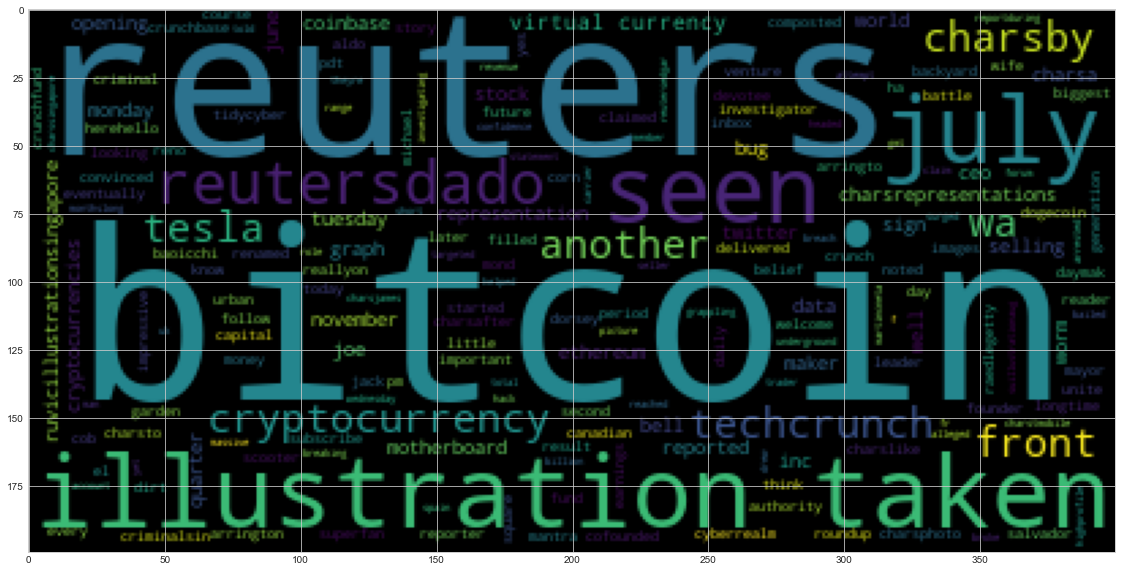

In [63]:
# Generate the Bitcoin word cloud
cloud_string = ' '.join(btc_tokens)
wc = WordCloud().generate(cloud_string)
plt.imshow(wc)

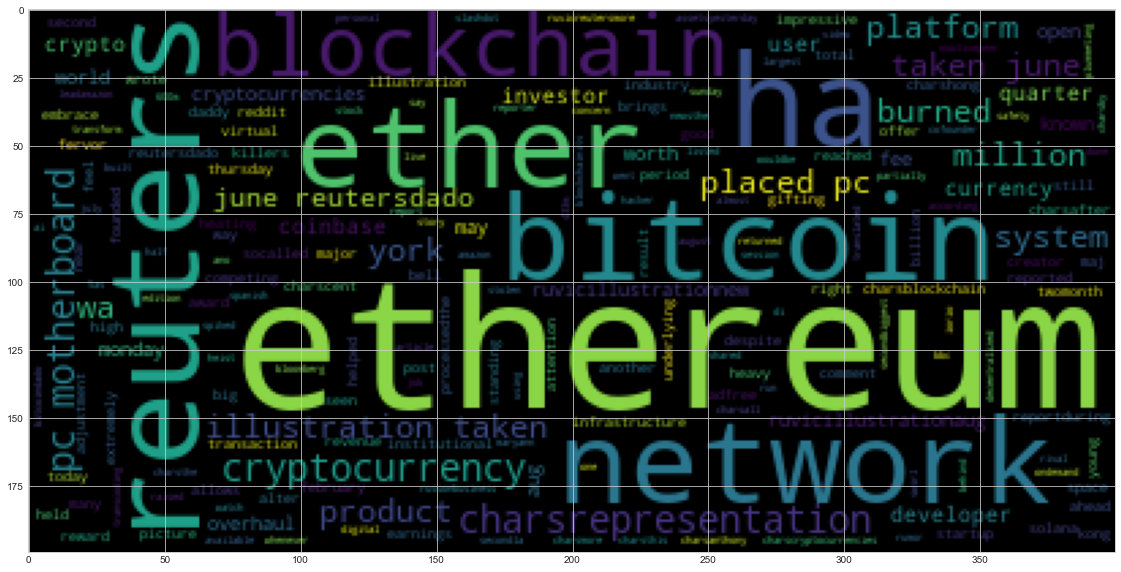

In [64]:
# Generate the Ethereum word cloud
eth_cloud_string = ' '.join(eth_tokens)
wc = WordCloud().generate(eth_cloud_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [66]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [68]:
# Run the NER processor on all of the text
btc_nlp = nlp(btc_string)
# Add a title to the document
btc_nlp.user_data["title"] = "Bitcoin Named Entity Recognition"

In [69]:
# Render the visualization
displacy.render(btc_nlp, style='ent')

In [70]:
# List all Entities
print([ent.text for ent in btc_nlp.ents])

['Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Joe Raedle/', 'Twitter', 'Square', 'Jack Dorsey', 'Monday', 'Joe', 'every day', '3 p.m. PDT', 'Daily Crunch', 'July 23, 2021', 'Michael Arrington', 'TechCrunch', 'Crunchbase', 'CrunchFund', 'Tuesday', '2017', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase', '$2.23 billion', 'July 28', 'Reuters', '40,000', 'Wednesday', 'Motherboard', 'June 7, 2021', 'REUTERS', 'Edgar Su/IllustrationAug', 'Reuters', '7.07%', '47,587.38', '2200', 'Martin/CNET\r\nA', 'UK', 'Spain', 'Twitter', '2020', 'the US Department of Justi', 'November 19, 2020', 'REUTERS', 'Dado Ruvic/IllustrationSINGAPORE', 'July 21', 'Reuters', 'Reuters', 'FILE', 'November 19, 2020', 'REUTERS', 'Dado Ruvic/Illustration\r\nSINGAPORE', '+410', 'Dado Ruvic/Illustration\r\nWelcome', '10', 'the Opening Bell', 'first', 'February 9, 2021', 'REUTERS', 'Dado', 'Reuters', 'Tesla Inc', 'July 20', 'Reuters', 'Tuesday', 'almost a month', '30,000', 'Reuters', 'Ju

---

### Ethereum NER

In [71]:
# Run the NER processor on all of the text
eth_nlp = nlp(eth_string)
# Add a title to the document
eth_nlp.user_data["title"] = "Ethereum Named Entity Recognition"

In [72]:
# Render the visualization
displacy.render(eth_nlp, style='ent')

In [73]:
# List all Entities
print([ent.text for ent in eth_nlp.ents])

['Ethereum', 'Ethereum Killers', 'Solana', '2017', 'Reddit', 'Ethereum', 'today', 'Coinbase', 'its second quarter', 'the quarter', 'Coinbase', '$2.23 billion', 'Ethereum', 'February 3, 2018', 'REUTERS', 'Dado Ruvic', 'Aug 5', 'Reuters', 'Aug 5', 'Reuters', 'two-month', 'Thursday', 'Ethereum', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/IllustrationAug 3', 'Reuters', 'Ethereum', 'Monday', 'Amazon', 'Amazon', 'Mary-Ann RussonBusiness', 'BBC News', 'almost half', '$600m', '433', 'Yesterday', 'Ethereum', 'Bloomberg', 'Slashdot', 'Ethereum', 'June 29, 2021', 'REUTERS', 'Dado Ruvic', 'July 30', 'Reuters', 'second', 'August 5', 'Sunday', 'over 45,799', 'second', 'Dado Ruvic', 'Reuters', 'More than $144 million', 'Livepeer', '$20 million', 'Ethereum', 'Spanish', 'AI', 'Xoy Capital', 'Guadalajara', 'Jalisco', 'Xoycoin', 'Ethereum', 'Monday', 'Chicago Bulls', 'American Express', 'Ethereum', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/IllustrationAug 10', 'Reuters', '+991 chars]NEW YORK', 'Reuters', 'a f

---